In [182]:
# This Model is ready                                                                                   13th August 2025
# Incomplete Task's
# But i have to make a web Page for this...          
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [183]:
df = pd.read_csv("ele-data.csv" , low_memory = False)

In [184]:
df.shape

(2075259, 9)

In [185]:
df.sample(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
57849,25/1/2007,21:33:00,3.142,0.000,241.020,13.000,0.000,0.000,18.0
1732639,2/4/2010,22:43:00,0.710,0.000,245.180,2.800,0.000,0.000,1.0
1484562,12/10/2009,16:06:00,0.218,0.000,242.340,0.800,0.000,0.000,1.0
908603,7/9/2008,16:47:00,2.016,0.124,240.120,8.800,1.000,25.000,1.0
2067954,21/11/2010,19:18:00,0.214,0.072,234.450,1.000,0.000,0.000,0.0
802487,26/6/2008,00:11:00,0.252,0.102,241.930,1.000,0.000,2.000,0.0
447191,23/10/2007,06:35:00,0.228,0.000,243.900,1.000,0.000,0.000,0.0
919650,15/9/2008,08:54:00,1.698,0.132,238.650,7.200,0.000,0.000,20.0
1458026,24/9/2009,05:50:00,0.224,0.138,240.880,1.000,0.000,0.000,1.0
1774524,2/5/2010,00:48:00,0.260,0.000,243.360,1.000,0.000,1.000,1.0


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [187]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df = df.dropna(subset =['DateTime'])

In [188]:
for col in df.columns:
    if col not in ['Date', 'Time', 'DateTime']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [189]:
df = df.dropna(subset=['Global_active_power'])

In [190]:
#df = df.drop(columns=['DataTime']) this is in Float dataType 

In [191]:
df['Day'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.weekday

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   DateTime               datetime64[ns]
 10  Day                    int32         
 11  Month                  int32         
 12  Hour                   int32         
 13  DayOfWeek              int32         
dtypes: datetime64[ns](1), float64(7), int32(4), object(2)
memory usage: 203.3+ MB


In [193]:
df.sample(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Day,Month,Hour,DayOfWeek
1757223,20/4/2010,00:27:00,1.322,0.064,241.18,5.4,0.0,0.0,19.0,2010-04-20 00:27:00,20,4,0,1
1967647,13/9/2010,03:31:00,0.248,0.098,241.18,1.0,0.0,0.0,1.0,2010-09-13 03:31:00,13,9,3,0
1830736,10/6/2010,01:40:00,0.204,0.000,242.47,1.0,0.0,0.0,0.0,2010-06-10 01:40:00,10,6,1,3
1842166,18/6/2010,00:10:00,0.526,0.000,242.08,2.2,0.0,0.0,0.0,2010-06-18 00:10:00,18,6,0,4
1199180,28/3/2009,11:44:00,1.576,0.094,241.73,6.4,0.0,0.0,18.0,2009-03-28 11:44:00,28,3,11,5


In [194]:
# plt.figure(figsize=(10,6))
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Heatmap")
# plt.show()
# the DataTime is in Float Format so there is an error in the { df.corr() }

In [195]:
df['Prev_Hour_Usage'] = df['Global_active_power'].shift(1)
df = df.dropna()

In [196]:
df = df.drop(columns=['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3','Date','DateTime','Time'])
# these are the features which are not of any use...
#So we are Dropping them...

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049279 entries, 1 to 2075258
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Global_active_power  float64
 1   Day                  int32  
 2   Month                int32  
 3   Hour                 int32  
 4   DayOfWeek            int32  
 5   Prev_Hour_Usage      float64
dtypes: float64(2), int32(4)
memory usage: 78.2 MB


In [198]:
x = df[['Day', 'Month', 'Hour', 'DayOfWeek', 'Prev_Hour_Usage']]
y = df['Global_active_power']

In [199]:
print(x)

         Day  Month  Hour  DayOfWeek  Prev_Hour_Usage
1         16     12    17          5            4.216
2         16     12    17          5            5.360
3         16     12    17          5            5.374
4         16     12    17          5            5.388
5         16     12    17          5            3.666
...      ...    ...   ...        ...              ...
2075254   26     11    20          4            0.946
2075255   26     11    20          4            0.946
2075256   26     11    21          4            0.944
2075257   26     11    21          4            0.938
2075258   26     11    21          4            0.934

[2049279 rows x 5 columns]


In [200]:
print(y)

1          5.360
2          5.374
3          5.388
4          3.666
5          3.520
           ...  
2075254    0.946
2075255    0.944
2075256    0.938
2075257    0.934
2075258    0.932
Name: Global_active_power, Length: 2049279, dtype: float64


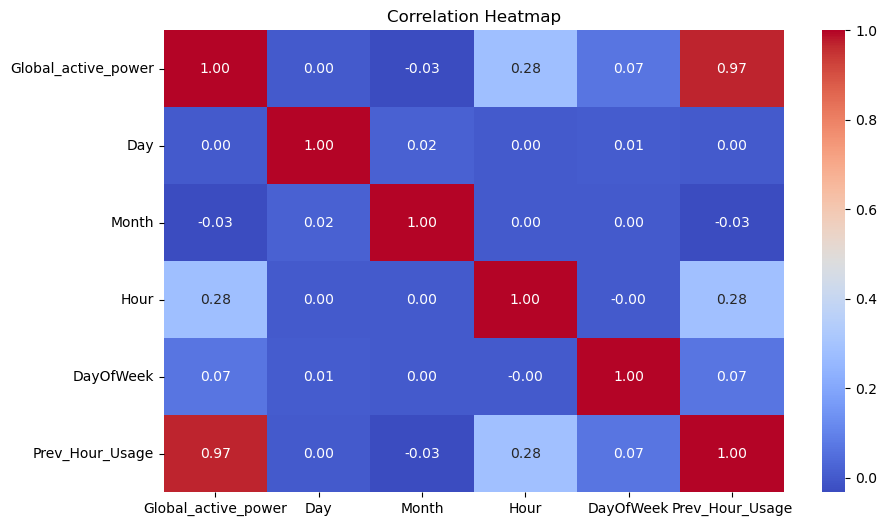

In [201]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [203]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [204]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [205]:
y_pred = model.predict(x_test)

In [206]:
MAE = mean_absolute_error(y_test, y_pred)

In [207]:
print("Mean Absolute Error: " , MAE)

Mean Absolute Error:  0.08371547466789639


In [208]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [209]:
print("Root Mean Squared Error: " , RMSE)

Root Mean Squared Error:  0.2197761892857439


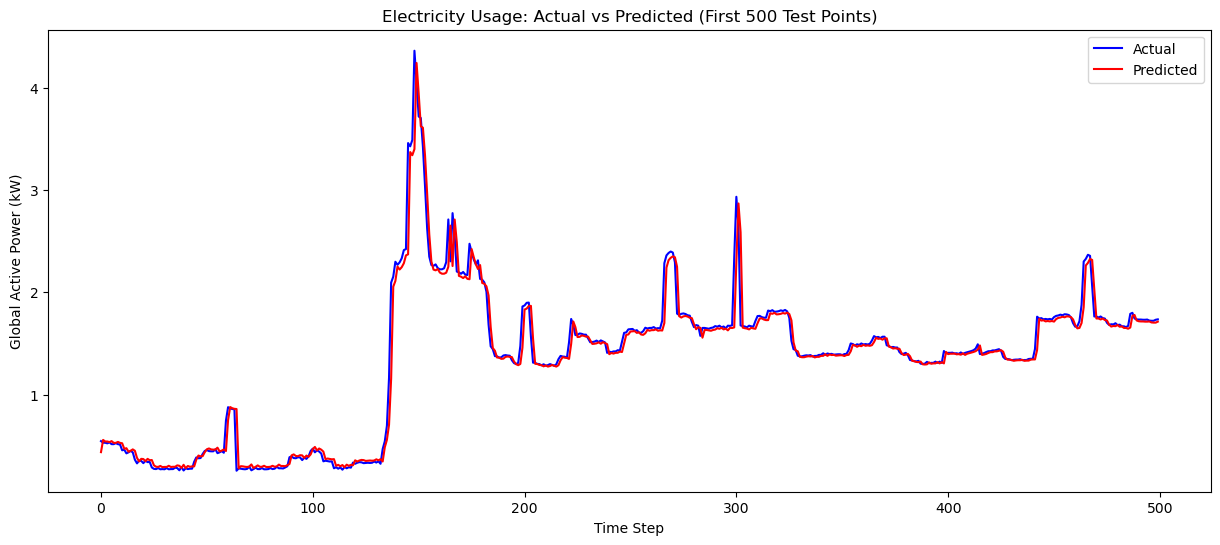

In [210]:
plt.figure(figsize=(15,6))
plt.plot(y_test.values[:500], label="Actual", color='blue')
plt.plot(y_pred[:500], label="Predicted", color='red')
plt.title("Electricity Usage: Actual vs Predicted (First 500 Test Points)")
plt.xlabel("Time Step")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.show()